### Libraries

In [1]:
import pandas as pd#data structures and operations for manipulating numerical tables and time series.
import pandas_datareader.data as data#Up-to-date remote data access for pandas.
import datetime as dt#supplies classes for manipulating dates and times
from datetime import timedelta
import matplotlib.pyplot as plt#plotting library for the Python.
import seaborn as sns;# visualizacion
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore') # We can suppress the warnings
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
from itertools import product

In [2]:
#!pip install pandas-datareader
#!pip install seaborn
#!conda install -c plotly plotly

### Contents

### I.- Describe Data :

This is research about 2 companies of renewable energy in the stock market. The problematic here is a forecasting, that consists of predicting the values in the future of these companies, we are working with time series.


#### A.- EDP Renováveis (EDPR.LS)

In [3]:
# We define the ticket from the companies that we are interested in research.

ticker = ['EDPR.LS']

# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'

today = dt.date.today()
yesterday = today - timedelta(days=1)
end_date = yesterday

# User pandas_reader.data.DataReader to load the desired data.
EDPR= data.DataReader('EDPR.LS', 'yahoo', start_date, end_date )
EDPR.head()

High    Low   Open  Close    Volume  Adj Close
Date                                                       
2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.967113
2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.941227
2016-01-06  7.250  7.136  7.240  7.238  345564.0   6.939310
2016-01-07  7.240  7.078  7.125  7.233  684252.0   6.934516
2016-01-08  7.299  7.171  7.233  7.194  447045.0   6.897126

In [4]:
EDPR.shape

(1611, 6)

In [5]:
EDPR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1611 entries, 2016-01-04 to 2022-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1611 non-null   float64
 1   Low        1611 non-null   float64
 2   Open       1611 non-null   float64
 3   Close      1611 non-null   float64
 4   Volume     1611 non-null   float64
 5   Adj Close  1611 non-null   float64
dtypes: float64(6)
memory usage: 88.1 KB


In [6]:
df_EDPR= EDPR.copy()
# To reset index and convert it to column
df_EDPR.reset_index(inplace=True) 
df_EDPR.head(2)


Date   High    Low   Open  Close    Volume  Adj Close
0 2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.967113
1 2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.941227

In [7]:
df_EDPR['Date'] = pd.to_datetime(df_EDPR.Date, format='%d/%m/%y')#convert  the Date data to datatime Type
df_EDPR.to_csv("EDPR.csv")# reserve and use in modelling

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [8]:
VWS= data.DataReader('VWS.CO', 'yahoo', start_date, end_date)
VWS.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2016-01-04  95.959999  94.440002  95.800003  95.040001  5363530.0  87.107895
2016-01-05  95.959999  94.440002  95.800003  95.040001    48610.0  87.107895
2016-01-06  95.360001  92.620003  94.800003  93.940002  4289335.0  86.099693
2016-01-07  92.379997  90.040001  92.000000  91.860001  8454065.0  84.193298
2016-01-08  93.339996  89.800003  91.680000  89.800003  7042265.0  82.305229

In [9]:
VWS.shape

(1573, 6)

In [10]:
VWS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1573 entries, 2016-01-04 to 2022-04-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1573 non-null   float64
 1   Low        1573 non-null   float64
 2   Open       1573 non-null   float64
 3   Close      1573 non-null   float64
 4   Volume     1573 non-null   float64
 5   Adj Close  1573 non-null   float64
dtypes: float64(6)
memory usage: 86.0 KB


In [11]:
df_VWS= VWS.copy()
# to reset index and convert it to column
df_VWS.reset_index(inplace=True) 
df_VWS.head(2)

Date       High        Low       Open      Close     Volume  Adj Close
0 2016-01-04  95.959999  94.440002  95.800003  95.040001  5363530.0  87.107895
1 2016-01-05  95.959999  94.440002  95.800003  95.040001    48610.0  87.107895

In [12]:
df_VWS['Date'] = pd.to_datetime(df_VWS.Date, format= '%d/%m/%y')#convert  the Date data to datatime Type
df_VWS.to_csv("VWS.csv")# reserve and use in modelling

### II.- Exploratory Data Analysis (EDA) 

#### A.- EDP Renováveis (EDPR.LS)

In [13]:
EDPR_T= EDPR.describe().transpose()
EDPR_T['Bool Mean'] = EDPR_T['mean'].gt(EDPR_T['50%'])#is the 'mean' greater than the MEDIAN?
#the distribution is positively skewed. 
EDPR_T

count           mean            std          min            25%  \
High       1611.0      11.430981       5.666927      5.75900       7.046500   
Low        1611.0      11.137582       5.427256      5.50000       6.956500   
Open       1611.0      11.282652       5.557978      5.50000       6.992500   
Close      1611.0      11.295328       5.551392      5.70000       7.000000   
Volume     1611.0  479024.774053  848603.233302  21033.00000  149559.000000   
Adj Close  1611.0      11.159119       5.622150      5.50601       6.794749   

                     50%           75%           max  Bool Mean  
High            8.790000      14.46000  2.640000e+01       True  
Low             8.620000      14.15000  2.535000e+01       True  
Open            8.690000      14.30000  2.580000e+01       True  
Close           8.710000      14.32000  2.580000e+01       True  
Volume     302598.000000  601499.00000  2.394718e+07       True  
Adj Close       8.538619      14.26125  2.569415e+01       True

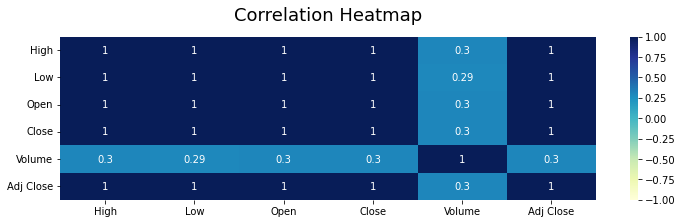

In [14]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(EDPR.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

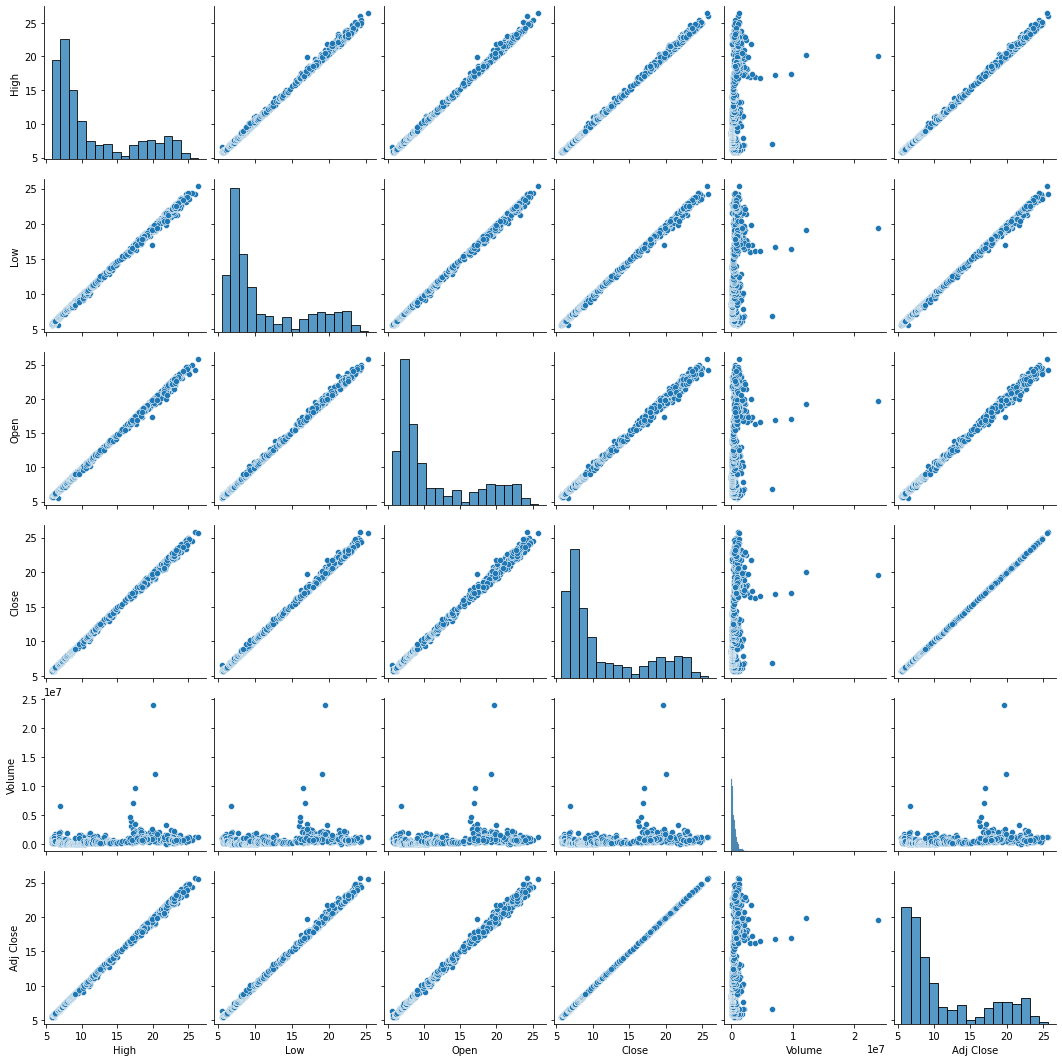

In [15]:
sns.pairplot(EDPR)

<AxesSubplot:>

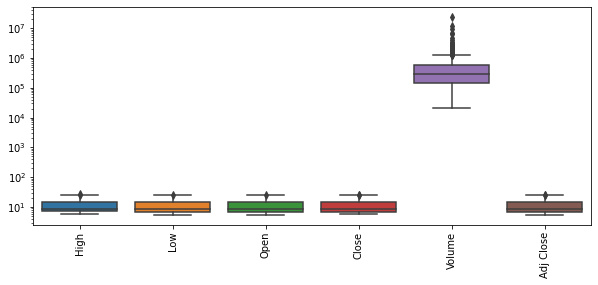

In [16]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=EDPR)

In [17]:
# We selected the main column  for us
close_EDPR= EDPR['Close']

# freq='B' stands for only weekdays
weekdays_EDPR= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need reindex close using all weekdays as the new index.
close_EDPR= close_EDPR.reindex(weekdays_EDPR)

#We filling the Missing values (NaN) with 'forward fill'
close_EDPR = close_EDPR.fillna(method='ffill')
close_EDPR = close_EDPR.dropna()# delete NaNs if there are more.
#we passed the information into Dataframe and rename the columns
close_EDPR = pd.DataFrame(close_EDPR).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_EDPR.head()

Close
2016-01-04  7.267
2016-01-05  7.240
2016-01-06  7.238
2016-01-07  7.233
2016-01-08  7.194

In [18]:
close_EDPR.tail()

Close
2022-04-08  23.610001
2022-04-11  23.049999
2022-04-12  22.900000
2022-04-13  22.700001
2022-04-14  23.129999

In [19]:
close_EDPR.describe()

Close
count  1639.000000
mean     11.273244
std       5.539479
min       5.700000
25%       6.998000
50%       8.705000
75%      14.260000
max      25.799999

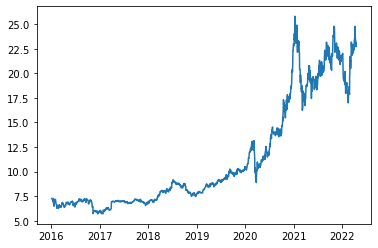

In [20]:
plt.plot(close_EDPR["Close"],label='EDPR Close Price history')

In [21]:
EDPR_df = close_EDPR

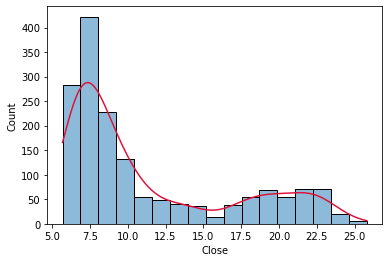

In [22]:
ax= sns.histplot(EDPR_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [23]:
EDPR_df.to_csv("EDPR_df.csv")

In [24]:
EDPR_df= pd.read_csv('EDPR_df.csv')#We decided works with a CSV for modeling 
EDPR_df.head()

Unnamed: 0  Close
0  2016-01-04  7.267
1  2016-01-05  7.240
2  2016-01-06  7.238
3  2016-01-07  7.233
4  2016-01-08  7.194

In [25]:
#Renaming column Unnamed: 0
list(EDPR_df.columns)

EDPR_df = EDPR_df.rename(columns={'Unnamed: 0': 'Date'})

In [26]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1639 non-null   object 
 1   Close   1639 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.7+ KB


In [27]:
EDPR_df= EDPR_df[['Date', 'Close']]

In [28]:
#we define date and we reindex the dataframe
EDPR_df.index = EDPR_df["Date"]

In [29]:
EDPR_df= EDPR_df.sort_index(ascending=True,axis=0)
df_1= pd.DataFrame(index=range(0,len(EDPR_df)),columns=['Date','Close'])
for i in range(0,len(df_1)):
    df_1["Close"][i]=EDPR_df["Close"][i]
    df_1["Date"][i]=EDPR_df['Date'][i]

EDPR_df = df_1
#convert  the Date data to datatime Type
EDPR_df["Date"] = pd.to_datetime(EDPR_df.Date, format="%Y/%m/%d")
EDPR_df.head()

Date  Close
0 2016-01-04  7.267
1 2016-01-05   7.24
2 2016-01-06  7.238
3 2016-01-07  7.233
4 2016-01-08  7.194

In [30]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1639 non-null   datetime64[ns]
 1   Close   1639 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 25.7+ KB


#### B.- Vestas Wind Systems A/S (VWS.CO)

In [31]:
VWS_T= VWS.describe().transpose()
VWS_T['Bool Mean'] = VWS_T['mean'].gt(VWS_T['50%'])#is the 'mean' greater than the MEDIAN?
#the distribution is positively skewed. 
VWS_T

count          mean           std           min           25%  \
High       1573.0  1.399404e+02  6.061356e+01     73.279999  9.332000e+01   
Low        1573.0  1.356266e+02  5.777148e+01     71.480003  9.090000e+01   
Open       1573.0  1.378748e+02  5.935015e+01     71.580002  9.220000e+01   
Close      1573.0  1.378368e+02  5.927437e+01     72.160004  9.232000e+01   
Volume     1573.0  4.255212e+06  3.012654e+06  48610.000000  2.600590e+06   
Adj Close  1573.0  1.343143e+02  6.080110e+01     68.264671  8.597186e+01   

                    50%           75%           max  Bool Mean  
High       1.136000e+02  1.858500e+02  3.210000e+02       True  
Low        1.112000e+02  1.792500e+02  3.110000e+02       True  
Open       1.125600e+02  1.834500e+02  3.140000e+02       True  
Close      1.124000e+02  1.834800e+02  3.120000e+02       True  
Volume     3.487865e+06  4.927155e+06  4.817422e+07       True  
Adj Close  1.078512e+02  1.822395e+02  3.093708e+02       True

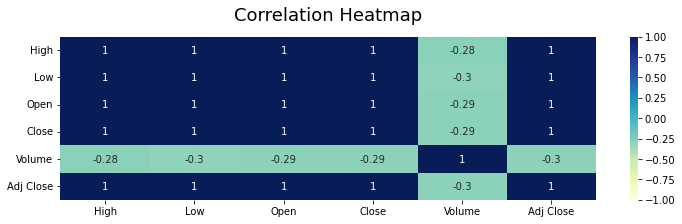

In [32]:
plt.figure(figsize = (12, 3))
heatmap= sns.heatmap(VWS.corr(),vmin=-1, vmax=1, annot = True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

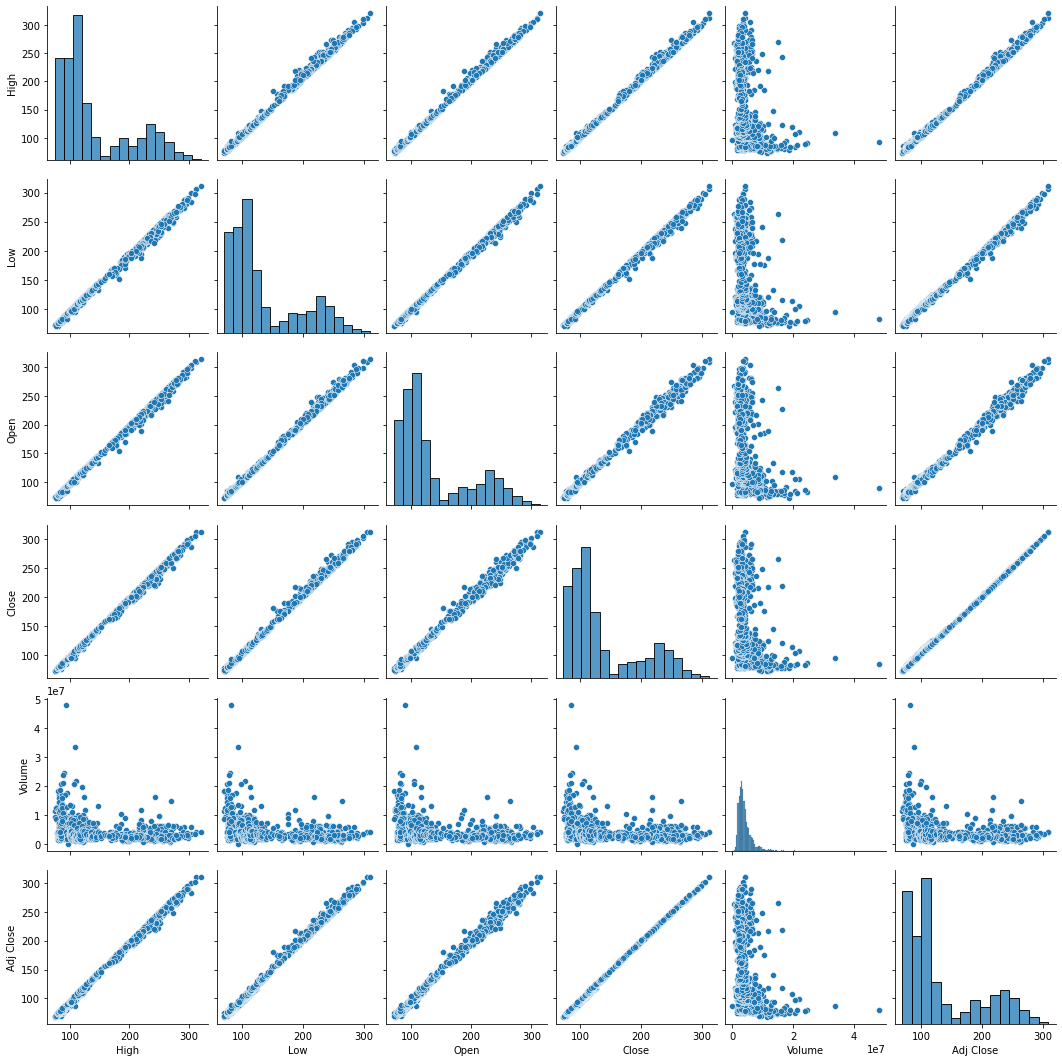

In [33]:
sns.pairplot(VWS)

<AxesSubplot:>

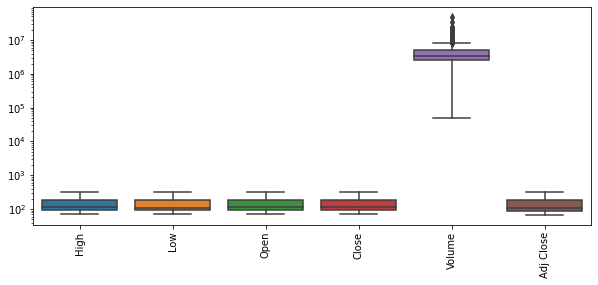

In [34]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=VWS)

In [35]:
# We selected the main column  for us
close_VWS= VWS['Close']

# freq='B' stands for only weekdays
weekdays_VWS= pd.date_range(start=start_date, end=end_date, freq='B')

 # We need to align the existing prices, so we reindex close using all weekdays as the new index.
close_VWS= close_VWS.reindex(weekdays_VWS)

#We filling the Missing values (NaN) with 'forward fill'
close_VWS = close_VWS.fillna(method='ffill')
#we passed the information into Dataframe and rename the columns
close_VWS= pd.DataFrame(close_VWS).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_VWS.head()

Close
2016-01-04  95.040001
2016-01-05  95.040001
2016-01-06  93.940002
2016-01-07  91.860001
2016-01-08  89.800003

In [36]:
close_VWS.tail()

Close
2022-04-08  213.850006
2022-04-11  210.399994
2022-04-12  202.399994
2022-04-13  200.350006
2022-04-14  200.350006

In [37]:
close_VWS.describe()

Close
count  1639.000000
mean    137.790952
std      59.340780
min      72.160004
25%      92.360001
50%     112.599998
75%     182.425003
max     312.000000

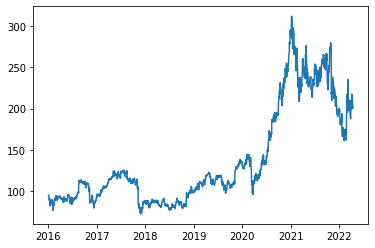

In [38]:
plt.plot(close_VWS["Close"],label='VWS Close Price history')

In [39]:
VWS_df = close_VWS

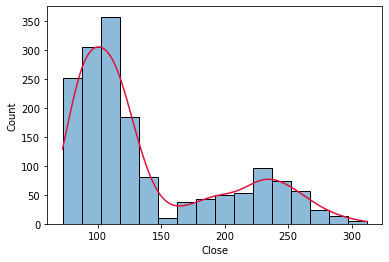

In [40]:
ax= sns.histplot(VWS_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [41]:
VWS_df.to_csv("VWS_df.csv")

In [42]:
VWS_df= pd.read_csv('VWS_df.csv')#We decided works with a CSV for modeling 
VWS_df.head()

Unnamed: 0      Close
0  2016-01-04  95.040001
1  2016-01-05  95.040001
2  2016-01-06  93.940002
3  2016-01-07  91.860001
4  2016-01-08  89.800003

In [43]:
#Renaming column Unnamed: 0
list(VWS_df.columns)

VWS_df = VWS_df.rename(columns={'Unnamed: 0': 'Date'})

In [44]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1639 non-null   object 
 1   Close   1639 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.7+ KB


In [45]:
VWS_df= VWS_df[['Date', 'Close']]

In [46]:
#we define  the dataframe index value as the data column
VWS_df.index = VWS_df["Date"]

In [47]:
VWS_df= VWS_df.sort_index(ascending=True,axis=0)
df_2 = pd.DataFrame(index=range(0,len(VWS_df)),columns=['Date','Close'])
for i in range(0,len(df_2)):
    df_2["Date"][i]=VWS_df['Date'][i]
    df_2["Close"][i]=VWS_df["Close"][i]

VWS_df = df_2
#convert  the Date data to datatime Type
VWS_df["Date"] = pd.to_datetime(VWS_df.Date, format="%Y/%m/%d")
VWS_df.head()

Date      Close
0 2016-01-04  95.040001
1 2016-01-05  95.040001
2 2016-01-06  93.940002
3 2016-01-07  91.860001
4 2016-01-08  89.800003

In [48]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1639 non-null   datetime64[ns]
 1   Close   1639 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 25.7+ KB


In [49]:
VWS_df = VWS_df.rename(columns={'Close': 'VWS'})
Stocks_df = VWS_df

In [50]:
Stocks_df["EDPR"] = EDPR_df["Close"]

In [51]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1639 non-null   datetime64[ns]
 1   VWS     1639 non-null   object        
 2   EDPR    1639 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 38.5+ KB


In [52]:
#we define  the dataframe'd index valu as the data column
Stocks_df.index = Stocks_df["Date"]

In [53]:
Stocks_df= Stocks_df.sort_index(ascending=True,axis=0)
df_3 = pd.DataFrame(index=range(0,len(Stocks_df)),columns=['Date','EDPR', 'VWS'])
for i in range(0,len(df_3)):
    df_3["Date"][i]=Stocks_df['Date'][i]
    df_3["EDPR"][i]=Stocks_df["EDPR"][i]
    df_3["VWS"][i]=Stocks_df["VWS"][i]

Stocks_df = df_3
#convert  the Date data to datatime Type
Stocks_df["Date"] = pd.to_datetime(Stocks_df.Date, format="%Y/%m/%d")
Stocks_df.head()

Date   EDPR        VWS
0 2016-01-04  7.267  95.040001
1 2016-01-05   7.24  95.040001
2 2016-01-06  7.238  93.940002
3 2016-01-07  7.233  91.860001
4 2016-01-08  7.194  89.800003

In [54]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1639 non-null   datetime64[ns]
 1   EDPR    1639 non-null   object        
 2   VWS     1639 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 38.5+ KB


In [55]:
Stocks_df.head()

Date   EDPR        VWS
0 2016-01-04  7.267  95.040001
1 2016-01-05   7.24  95.040001
2 2016-01-06  7.238  93.940002
3 2016-01-07  7.233  91.860001
4 2016-01-08  7.194  89.800003

In [56]:
import plotly.express as px
graphic = px.line(title = 'Stock price history')
for i in Stocks_df.columns[1:]:
  graphic.add_scatter(x = Stocks_df['Date'], y = Stocks_df[i], name = i)
graphic.show()

In [57]:
#Splinting into X/y
X = Stocks_df.drop('Date', axis=1)
y= Stocks_df['Date']
Stocks_normalized = X
Stocks_normalized.head()

EDPR        VWS
0  7.267  95.040001
1   7.24  95.040001
2  7.238  93.940002
3  7.233  91.860001
4  7.194  89.800003

In [58]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(Stocks_normalized)
Stocks = scaler.transform(Stocks_normalized)
DF= pd.DataFrame(Stocks)
DF.rename(columns= {0: 'EDPR', 1: 'VWS'}, inplace=True)
X = DF
X['Date'] = y
X.set_index(X.columns[-1], inplace=True)
X.reset_index(inplace=True)
Stock_norm = X

In [59]:
Stock_norm.head()

Date      EDPR       VWS
0 2016-01-04  0.077960  0.095397
1 2016-01-05  0.076617  0.095397
2 2016-01-06  0.076517  0.090811
3 2016-01-07  0.076269  0.082138
4 2016-01-08  0.074328  0.073549

In [60]:
Stock_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1639 non-null   datetime64[ns]
 1   EDPR    1639 non-null   float64       
 2   VWS     1639 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.5 KB


In [61]:
#Visualizing the graphic with the normalized data

graphic_norm = px.line(title = 'Stock price history')
for i in Stock_norm.columns[1:]:
  graphic_norm.add_scatter(x = Stock_norm['Date'], y = Stock_norm[i], name = i)
graphic_norm.show()

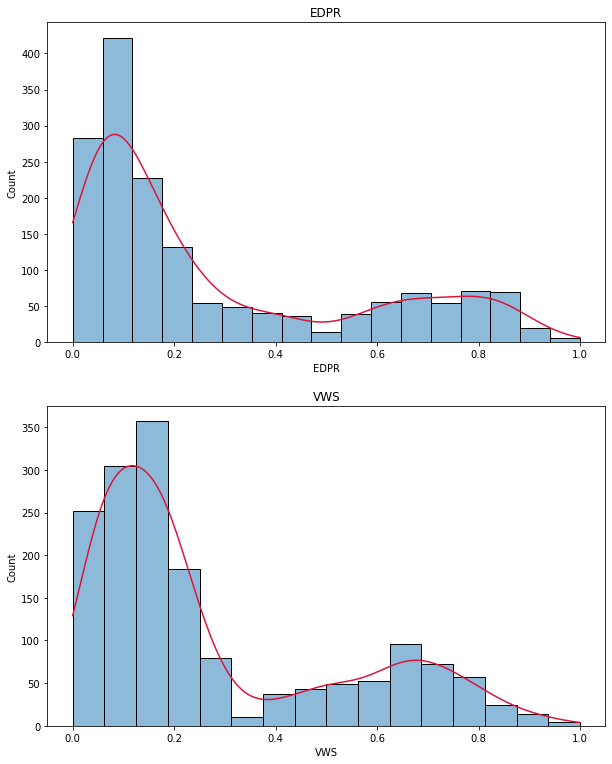

In [62]:
import numpy as np
plt.figure(figsize=(10,20))
i = 1
for i in np.arange(1, len(Stock_norm.columns)):
    plt.subplot(3, 1, i + 1)
    ax=sns.histplot(Stock_norm[Stock_norm.columns[i]], kde = True)
    ax.lines[0].set_color('crimson')
    plt.title(Stock_norm.columns[i])

### II.1- ETS-Decomposition


ETS-Decomposition is a method that allows us to visualize the data after a decomposition of time series into three distinct components: trend, seasonality, and noise.

* Additive decomposition: yt = St + Tt + Rt
* Multiplicative decomposition: yt = St * Tt * Rt

where, 
- S represents the Seasonal variation
- T encodes Trend plus Cycle
- R describes the Residual or the Error component.
Daitan (2019)

#### A.- EDP Renováveis (EDPR.LS)

In [63]:
EDPR= pd.read_csv('EDPR.csv',index_col='Date',parse_dates=True)#We use the first CSV that we create for modeling 
#.asfreq(freq='b')
EDPR.head(2)

Unnamed: 0   High    Low   Open  Close    Volume  Adj Close
Date                                                                   
2016-01-04           0  7.267  7.120  7.133  7.267  628745.0   6.967113
2016-01-05           1  7.344  7.192  7.250  7.240  623709.0   6.941227

In [64]:
EDPR.drop(columns=['Unnamed: 0']).dropna().head(2)#cleaning data

High    Low   Open  Close    Volume  Adj Close
Date                                                       
2016-01-04  7.267  7.120  7.133  7.267  628745.0   6.967113
2016-01-05  7.344  7.192  7.250  7.240  623709.0   6.941227

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

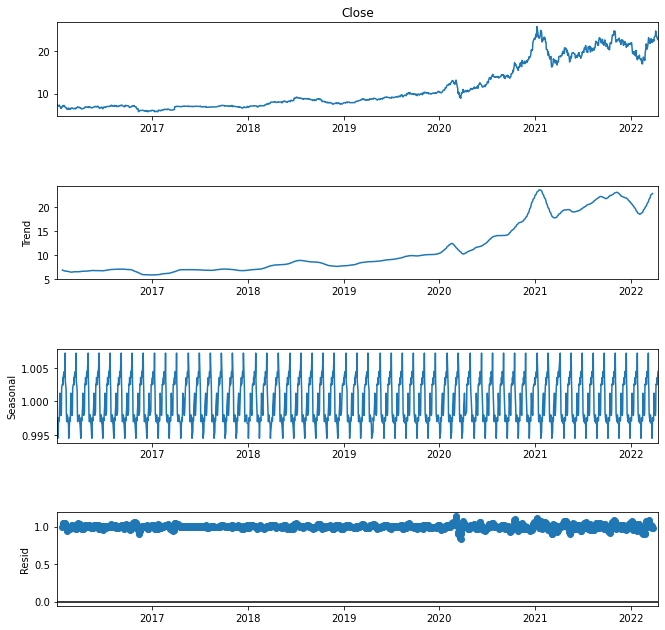

In [66]:
result = seasonal_decompose(EDPR['Close'], model='mul',freq=30)  # model='mul' also works
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 10)

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [67]:
VWS= pd.read_csv('VWS.csv',index_col='Date', parse_dates=True)#We use the first CSV that we create for modeling 
VWS.head(2)

Unnamed: 0       High        Low       Open      Close     Volume  \
Date                                                                            
2016-01-04           0  95.959999  94.440002  95.800003  95.040001  5363530.0   
2016-01-05           1  95.959999  94.440002  95.800003  95.040001    48610.0   

            Adj Close  
Date                   
2016-01-04  87.107895  
2016-01-05  87.107895

In [68]:
VWS.drop(columns=['Unnamed: 0']).head(2)#cleaning data

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2016-01-04  95.959999  94.440002  95.800003  95.040001  5363530.0  87.107895
2016-01-05  95.959999  94.440002  95.800003  95.040001    48610.0  87.107895

<Figure size 432x288 with 0 Axes>

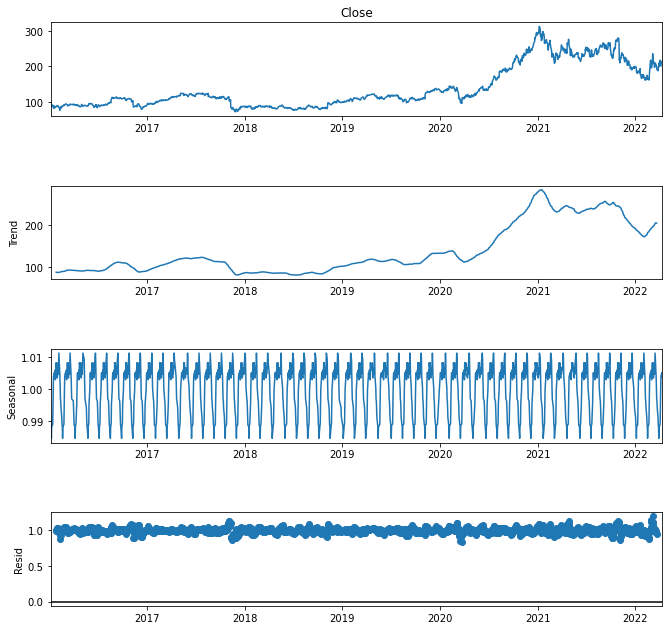

In [69]:
result = seasonal_decompose(VWS['Close'], model='multiplicative',freq=30)  # model='mul' also works
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 10)

### II.2.- Augmented Dickey–Fuller test

The Augmented Dickey-Fuller test helps us to detect if a time series is or not “stationary”. Stationary means that the data has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time. It is ‘stationarize’ the time series as part of the process of fitting a model.Zach (2021) 

In [70]:
def ADFuller(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(key, value, 'not' if value < result[0] else '', 100-int(key[:-1])))
        

In [71]:
### Plot for testing Stationarity with mean and standard deviation
def plot_stationarity(timeseries, title):
    
    #Determing rolling statistics
    mean = pd.Series(timeseries).rolling(30).mean()#rolling a month
    std = pd.Series(timeseries).rolling(30).std()#rolling a month
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(mean, label='rolling mean');
    ax.plot(std, label='rolling std');
    ax.legend()

#### A.- EDP Renováveis (EDPR.LS)

In [72]:
ADFuller(EDPR['Close'])

ADF Statistic: -0.215352
p-value: 0.936667
Critical Values:
	1%: -3.4344824429999132 - The data is not stationary with 99% confidence
	5%: -2.863365228537185 - The data is not stationary with 95% confidence
	10%: -2.567741717501418 - The data is not stationary with 90% confidence


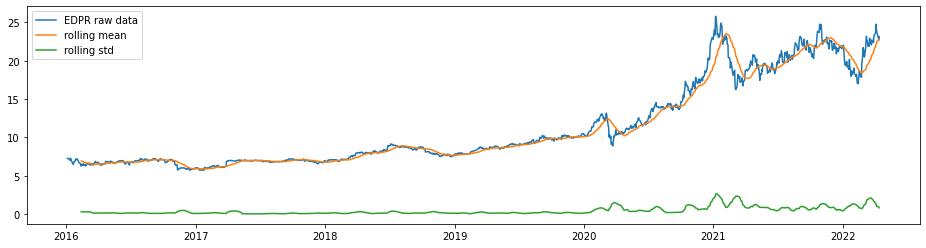

In [73]:
plot_stationarity(EDPR['Close'],'EDPR raw data')

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [74]:
ADFuller(VWS['Close'])

ADF Statistic: -1.057419
p-value: 0.731751
Critical Values:
	1%: -3.4345326637419276 - The data is not stationary with 99% confidence
	5%: -2.863387394655722 - The data is not stationary with 95% confidence
	10%: -2.5677535209080573 - The data is not stationary with 90% confidence


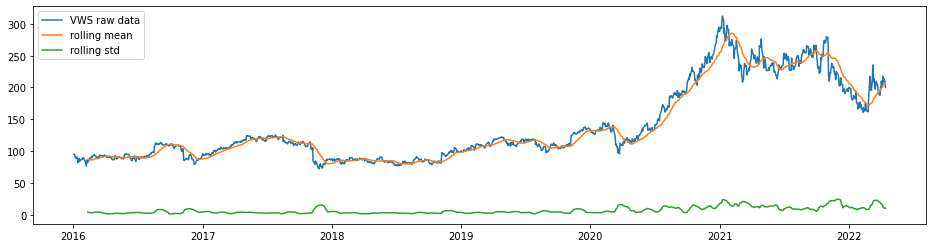

In [75]:
plot_stationarity(VWS['Close'],'VWS raw data')

### II.3.- Make the Data Stationary

#### Detrending 

##### A.- EDP Renováveis (EDPR.LS)

ADF Statistic: -6.557392
p-value: 0.000000
Critical Values:
	1%: -3.4345299901327717 - The data is  stationary with 99% confidence
	5%: -2.8633862146041014 - The data is  stationary with 95% confidence
	10%: -2.567752892531793 - The data is  stationary with 90% confidence


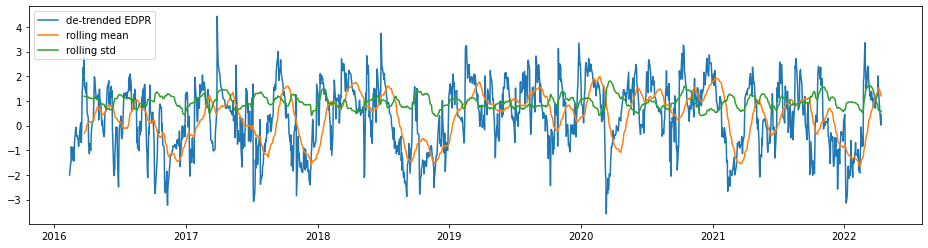

In [83]:
EDPR_detrend =  (EDPR['Close'] - EDPR['Close'].rolling(30).mean())/EDPR['Close'].rolling(30).std()
plot_stationarity(EDPR_detrend,'de-trended EDPR')
ADFuller(EDPR_detrend.dropna())

##### B.- Vestas Wind Systems A/S (VWS.CO)

ADF Statistic: -7.309500
p-value: 0.000000
Critical Values:
	1%: -3.4346117143132786 - The data is  stationary with 99% confidence
	5%: -2.8634222847534607 - The data is  stationary with 95% confidence
	10%: -2.567772099925964 - The data is  stationary with 90% confidence


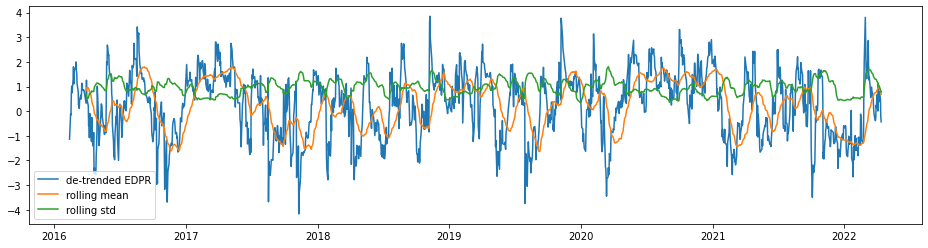

In [84]:
VWS_detrend =  (VWS['Close'] - VWS['Close'].rolling(30).mean())/VWS['Close'].rolling(30).std()
plot_stationarity(VWS_detrend,'de-trended EDPR')
ADFuller(VWS_detrend.dropna())

#### Differencing

##### A.- EDP Renováveis (EDPR.LS)

ADF Statistic: -7.433003
p-value: 0.000000
Critical Values:
	1%: -3.434556881024473 - The data is  stationary with 99% confidence
	5%: -2.8633980833965986 - The data is  stationary with 95% confidence
	10%: -2.5677592126592605 - The data is  stationary with 90% confidence


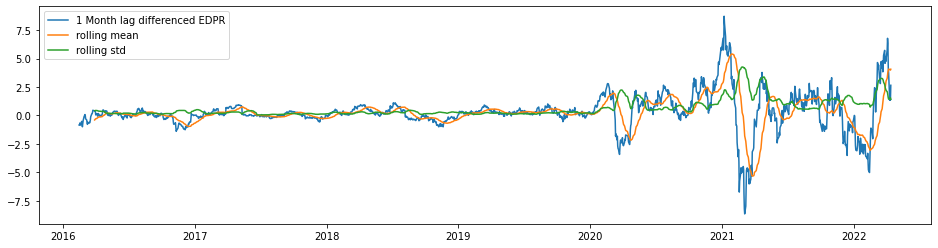

In [88]:
EDPR_Differencing =  EDPR['Close'] - EDPR['Close'].shift(30)

plot_stationarity(EDPR_Differencing, '1 Month lag differenced EDPR')
ADFuller(EDPR_Differencing.dropna())

##### B.- Vestas Wind Systems A/S (VWS.CO)

ADF Statistic: -7.110551
p-value: 0.000000
Critical Values:
	1%: -3.4346651465364264 - The data is  stationary with 99% confidence
	5%: -2.863445867307207 - The data is  stationary with 95% confidence
	10%: -2.567784657747782 - The data is  stationary with 90% confidence


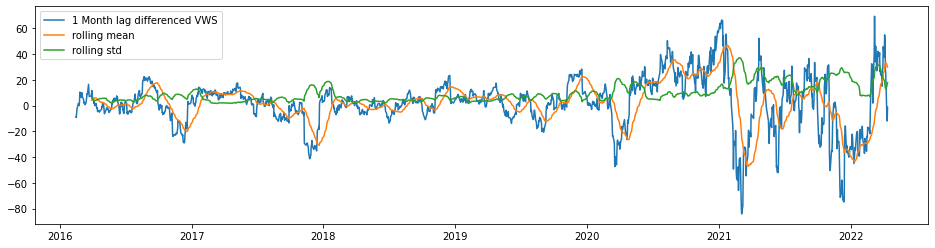

In [90]:
VWS_Differencing =  VWS['Close'] - VWS['Close'].shift(30)

plot_stationarity(VWS_Differencing, '1 Month lag differenced VWS')
ADFuller(VWS_Differencing.dropna())

#### Detrending + Differencing

##### A.- EDP Renováveis (EDPR.LS)

ADF Statistic: -8.589892
p-value: 0.000000
Critical Values:
	1%: -3.4346284441307184 - The data is  stationary with 99% confidence
	5%: -2.863429668579316 - The data is  stationary with 95% confidence
	10%: -2.5677760318409732 - The data is  stationary with 90% confidence


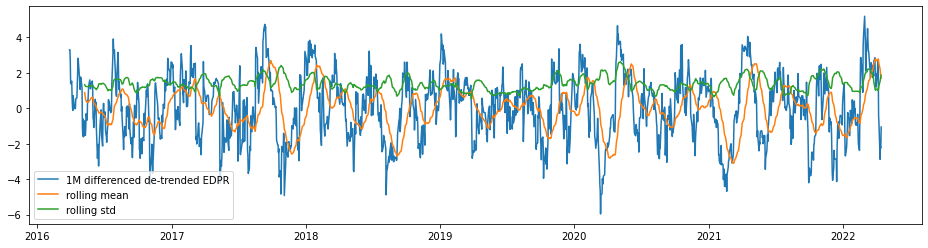

In [92]:
EDPR_detrend_Diff=  EDPR_detrend - EDPR_detrend.shift(30)

plot_stationarity(EDPR_detrend_Diff,'1M differenced de-trended EDPR')
ADFuller(EDPR_detrend_Diff.dropna())

##### B.- Vestas Wind Systems A/S (VWS.CO)

ADF Statistic: -10.726639
p-value: 0.000000
Critical Values:
	1%: -3.4347493345634006 - The data is  stationary with 99% confidence
	5%: -2.863483023222698 - The data is  stationary with 95% confidence
	10%: -2.5678044435869762 - The data is  stationary with 90% confidence


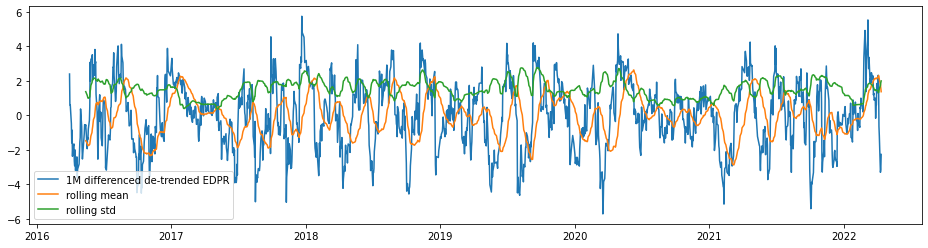

In [93]:
VWS_detrend_Diff=  VWS_detrend - VWS_detrend.shift(30)

plot_stationarity(VWS_detrend_Diff,'1M differenced de-trended EDPR')
ADFuller(VWS_detrend_Diff.dropna())

### IV. Moving Averages

In [ ]:
#create moving average by applying a mean function to a rolling window.
EDPR['SMA1M'] = EDPR['Close'].rolling(window=30).mean()

#EDPR.head()

In [ ]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
EDPR['EWMA1M'] = EDPR['Close'].ewm(span=30,adjust=False).mean()
#EDPR.head()

In [ ]:
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 30
alpha = 2/(span+1)
EDPR['SES1M']=SimpleExpSmoothing(EDPR['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues
EDPR.tail()

In [ ]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

EDPR['DESadd1M'] = ExponentialSmoothing(EDPR['Close'], trend='add').fit().fittedvalues

In [ ]:
#the last year
EDPR[['Close','SMA1M','EWMA1M','SES1M','DESadd1M']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### V.- Identifying AR and MA orders by ACF and PACF plots

After knowing that the time series is stationary we can plot ACF and PACF in order to identify AR and MA terms in the ARMA model. Plotting them help us to undertand how to choose the best q and p values from them.
In linear regression models performs best when the predictors are not correlated and are independent of each other.

In [ ]:
# Calculate the residual by subtracting the average values
EDPR['residual'] = EDPR['Close'] - EDPR['Close'].mean()

# Drop the missing values
EDPR = EDPR.dropna()

# Plot the close price with 50 lag values
plot_acf(EDPR.Close, lags = 30)

# Display partial auto correaltion function
x = plot_pacf(EDPR.Close, lags = 30)

Blue bars on the plots above are the error bands, everything in this area is not statistically significant. 
ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modeling.

In [ ]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
x = sm.qqplot(EDPR['Close'], line = 's')

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.

In [ ]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = EDPR['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

In [ ]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
EDPR['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of EDPR during 2016 until today')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of EDPR during 2016 until today')

In [ ]:
# plot the data with 50 lags
plt.figure(figsize=(12, 10))
layout = (2, 2)
    
ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
ax_acf= plt.subplot2grid(layout, (1, 0))
ax_pacf = plt.subplot2grid(layout, (1, 1))
    
first_order_diff.plot(ax = ax_xt)
ax_xt.set_title('Time Series')
plot_acf(first_order_diff, lags = 50, ax = ax_acf)
plot_pacf(first_order_diff, lags = 50, ax = ax_pacf)
plt.tight_layout()

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [ ]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 =EDPR.iloc[:125].Close.mean(), EDPR.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = EDPR.iloc[:125].Close.var(), EDPR.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

### VI.-ARMA

q is number of lagged forecast errors that should go into the ARIMA Model.

In [ ]:
aicVal=[]

ar =1 #0 , 1 , 2 #p is number of lags of Y to be used as predictors
ma =0 #1 , 0 , 0 #q is number of lagged forecast errors that should go into the ARIMA Model.
#d is the number of differencing required to make the time series stationary
# 1, 0 is the lowest coefficient

arma_obj = smtsa.ARMA(EDPR.Close.tolist(), order=(ar, ma)).fit(maxlag=30, method='mle', trend='nc') 
aicVal.append([ar, ma, arma_obj.aic])
print(aicVal)
# mle: Maximum Likelihood Estimation 
# nc: no constant        

Akaike Information Criteria(AIC) is a  statistical measure to compare different models for their relative quality

In [ ]:
arma_obj= smtsa.ARMA(EDPR.Close.tolist(), order = (1, 0)).fit(maxlag = 30, method='mle', trend='nc') 
EDPR['ARMA']=arma_obj.predict()
arma_obj.summary()

In [ ]:
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)
EDPR.Close.iloc[1:].plot(color = 'b', linestyle = '-', ax = axarr)
EDPR['ARMA'].iloc[1:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')

### VII.-ARIMA

In [ ]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(EDPR['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)            

In [ ]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(EDPR['Close'].tolist(), order = (0, 2, 1))#smallest number

# d = 2, the number of times that the raw observations are differenced, also called the degree of differencing.

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit(disp = 0)

# disp : int, optional
# If True, convergence information is printed.  For the default l_bfgs_b solver, disp controls the frequency of the output 
# during the iterations. disp < 0 means no output in this case.

# Display the summary of the trained model
arima_obj_fit.summary()

In [ ]:
# Declare the array 'pred' and append the values 
pred = np.append([0, 0], arima_obj_fit.fittedvalues.tolist())

# Add a new column 'ARIMA' into dataframe
EDPR['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = np.append([0, 0], arima_obj_fit.resid + arima_obj_fit.fittedvalues)

# Add a column 'diffval' into dataframe
EDPR['diffval'] = diffval

#drop
EDPR.drop(columns=['Unnamed: 0'])
# Display first five records
EDPR.tail()

In [ ]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

In [ ]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first two rows because of difference factor d = 2
EDPR['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
EDPR['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

In [ ]:
f, err, ci = arima_obj_fit.forecast(60)
plt.plot(f)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure

### VII.-SARIMA

In [ ]:
# order = (2, 1, 2) means 
# First 2 for auto regressive model, 1 for difference, and second 2 for moving average
# seasonal_order = (2, 1, 2, 12) means
# 12 additional parameter means number of observations per year or the period
best_model = SARIMAX(EDPR['Close'], order = (2, 1, 2), seasonal_order = (2, 1, 2, 12)).fit(dis = -1)

# Display the summary of the model
print(best_model.summary())

In [ ]:
# Diagnosing the model residuals
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

## Complementary Reading

Reference: Efstathopoulos g. (2020) Python for Finance, Part I: Yahoo & Google Finance API, pandas, and matplotlib 
Available at: URL <a href="https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ ">https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ </a>(Accessed 14 October 2021).  

Reference: Witham, J. (2020) The Imperative For A 24/7 Renewable Energy World, Forbes. 
Available at: URL <a href="https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo">https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo/ </a>(Accessed 14 October 2021).  

Reference: Norris, E. (2021) "Why Did My Stock's Ticker Change?", Investopedia. 
Available at: URL <a href="https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/">https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/ </a>(Accessed 14 October 2021).  

Reference: Mahgoub, A. (2021) "Stock Prediction using Regression Algorithm in Python", Medium. 
Available at: URL <a href="https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9/">https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9</a>(Accessed 25 Feb 2022). 

Reference: Prabhakaran, S. (2019) "Augmented Dickey Fuller Test (ADF Test) – Must Read Guide", Medium. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.">https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.</a>

Reference: Masum, M. (2020) "Time Series Analysis: Identifying AR and MA using ACF and PACF Plots", Medium. 
Available at: URL <a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8</a> (Accessed 21 March 2022).  

Reference: Zvornicanin E. (2021) "Choosing the best q and p from ACF and PACF plots in ARMA-type modeling", Baeldung. 
Available at: URL <a href="https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling">https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling</a> (Accessed 21 March 2022). 


Reference: Prabhakaran S. (2021) "ARIMA Model – Complete Guide to Time Series Forecasting in Python", Machinelearningplus. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/">https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/</a> (Accessed 21 March 2022). 

Reference: Daitan (2019) "A Visual Guide to Time Series Decomposition Analysis", Betterprogramming 
Available at: URL <a href="https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930">https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930</a> (Accessed 14 April 2022).

Reference: Zach (2021) "Augmented Dickey-Fuller Test in Python (With Example)", Statology.org 
Available at: URL <a href="https://www.statology.org/dickey-fuller-test-python/">https://www.statology.org/dickey-fuller-test-python/</a> (Accessed 14 April 2022).

Reference: Shao V.(2020) "Forecasting with a Time Series Model using Python: Part One", Bounteous
Available at: URL <a href="https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/">https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/</a> (Accessed 15 April 2022).